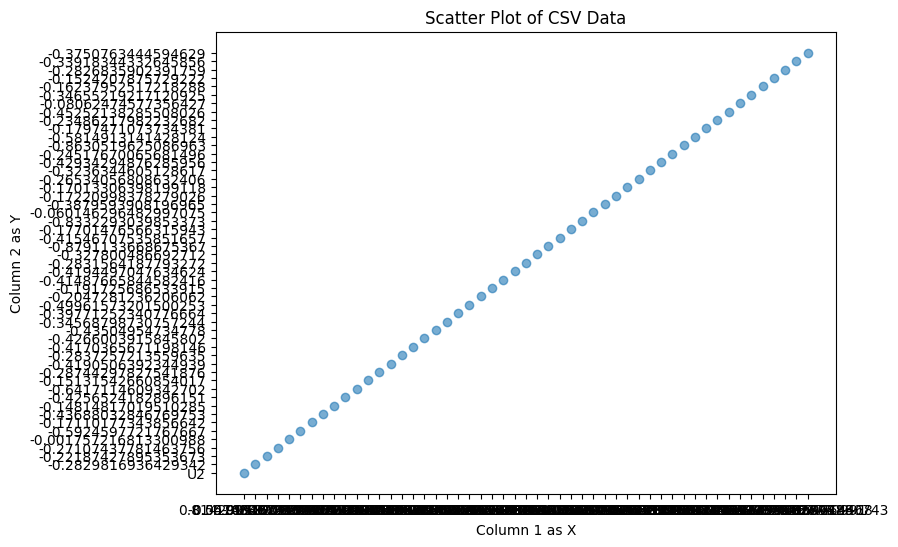

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_csv_xy(filename):
    data = pd.read_csv(filename, header=None)  # Assuming no header in the file
    
    # Plotting
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    plt.scatter(data[0], data[1], alpha=0.6)  # Plot points with some transparency for better visualization if points overlap
    plt.title('Scatter Plot of CSV Data')
    plt.xlabel('Column 1 as X')
    plt.ylabel('Column 2 as Y')
    # plt.grid(True)  # Show grid for better readability
    plt.show()

plot_csv_xy('HW4_prob2.csv')


In [9]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the data
data = pd.read_csv('HW4_prob2.csv', header=None)
# print(data.values)
x = torch.tensor(data[1:].values)

# Create DataLoader
dataset = TensorDataset(x, x)  # Autoencoder uses the same data as input and target
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 8),  # Assuming 2-dimensional input data (x,y)
            nn.ReLU(),
            nn.Linear(8, 3),  # Compressed representation
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 8),
            nn.ReLU(),
            nn.Linear(8, 2),  # Output dimensions same as input (x,y)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
model = Autoencoder().cuda()  # Use CUDA if available
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200  # You might need to adjust this
for epoch in range(num_epochs):
    for data, _ in dataloader:
        data = data.cuda()  # Use CUDA if available
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
with torch.no_grad():
    new_data = model(x.cuda()).cpu()  # Generate new data based on the original dataset


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], color='blue', alpha=0.5, label='Original Data')
plt.scatter(new_data[:, 0], new_data[:, 1], color='red', alpha=0.5, label='Generated Data')
plt.title('Original vs Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
